In [1]:
words = open("../data/names.txt", 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [2]:
len(words)

32033

In [3]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [4]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [5]:
import torch

N = torch.zeros((27, 27), dtype=torch.int32)

In [6]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [7]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

(-0.5, 26.5, 26.5, -0.5)

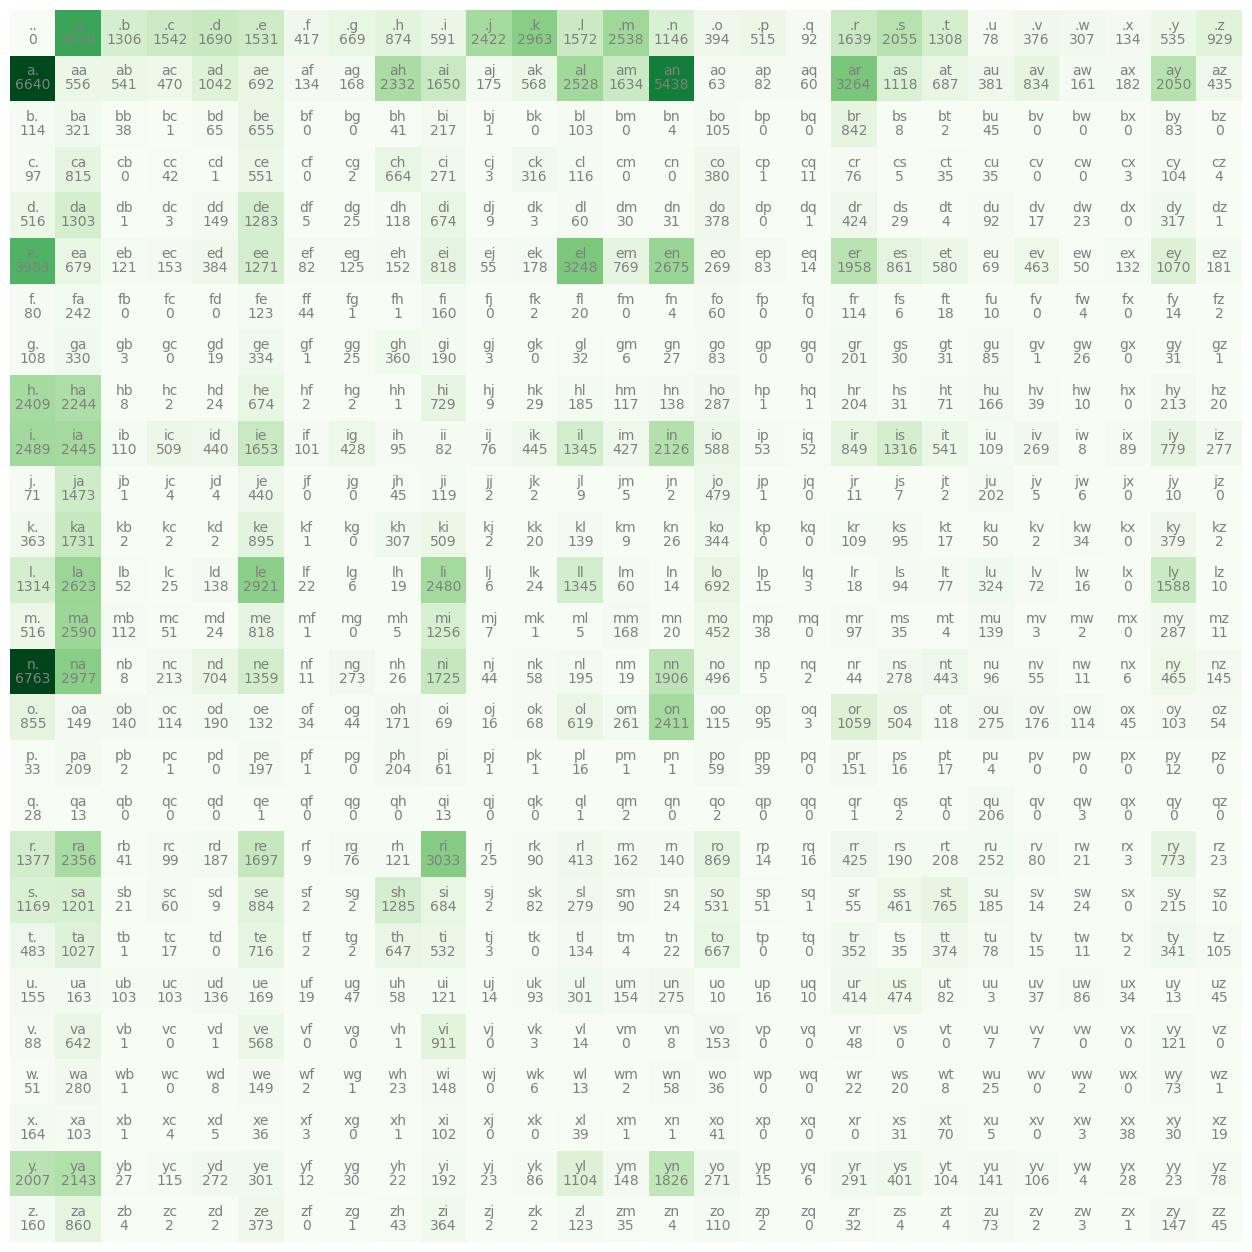

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Greens')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')

In [9]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [10]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [11]:
g = torch.Generator().manual_seed(123)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'a'

In [12]:
g = torch.Generator().manual_seed(123)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.2782, 0.4853, 0.2365])

In [13]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 2, 0, 2, 2, 0, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 2, 1,
        0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0,
        1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 2, 0])

In [14]:
p.shape

torch.Size([3])

In [17]:
P.shape

torch.Size([27, 27])

In [18]:
P.sum(1).shape

torch.Size([27])

In [16]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [19]:
g = torch.Generator().manual_seed(123)
for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

ayl.
eeieahviannalizyr.
pidouyra.
jon.
cerrdyanaya.


### Goal: maximize likelihood of the data w.r.t. model paramters (statistical modeling)
- equivalent to maxmimizing the log likelihood (because log is monotonic)
- $\log(a*b*c) = \log(a) + \log(b) + \log(c)$

In [21]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        #print(f"{ch1}{ch2}: {prob:.4f}{logprob:.4f}")
print(f"{log_likelihood=}")
nll = -log_likelihood
print(f"{nll=}")
print(f"{nll/n}")

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [22]:
# create a training set of bigrams (x, y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [23]:
xs

tensor([ 0,  5, 13, 13,  1])

In [24]:
ys

tensor([ 5, 13, 13,  1,  0])

In [25]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [26]:
xenc.shape

torch.Size([5, 27])

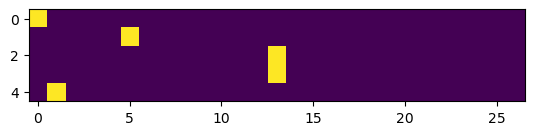

In [27]:
plt.imshow(xenc)

In [28]:
xenc.dtype

torch.float32

In [29]:
W = torch.randn((27, 1))
xenc @ W

tensor([[ 0.8840],
        [ 1.2964],
        [-2.0577],
        [-2.0577],
        [-0.1426]])

In [30]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent to N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [31]:
probs[0]

tensor([1.])

In [33]:
# ----- SUMMARY ----- # 
xs

tensor([ 0,  5, 13, 13,  1])

In [34]:
ys

tensor([ 5, 13, 13,  1,  0])

In [35]:
# randomly initialize 27 neuron's weights. Each neuron receives 27 inputs
g = torch.Generator().manual_seed(123)
W = torch.randn((27, 27), generator=g)

In [36]:
xenc = F.one_hot(xs, num_classes=27).float() # Input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for the next character
# last two lines are together called 'softmax'

In [37]:
probs.shape

torch.Size([5, 27])

In [38]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print("-------")
    print(f"bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})")
    print("input to the neural net: ", x)
    print("Output probabilities from the neural net: ", probs[i])
    print("label (actual next character): ", y)
    p = probs[i, y]
    print("probability assigned by the net to the correct character: ", p.item())
    logp = torch.log(p)
    print("log likelihood: ", logp.item())
    nll = -logp
    print("negative log likelihood: ", nll.item())
    nlls[i] = nll
print("=======")
print("average negative log likelihood, i.e. loss = ", nlls.mean().item())

-------
bigram example 1: .e (indexes 0, 5)
input to the neural net:  0
Output probabilities from the neural net:  tensor([0.0305, 0.0182, 0.0161, 0.0121, 0.0309, 0.0421, 0.0175, 0.0149, 0.0469,
        0.0066, 0.0438, 0.0053, 0.0261, 0.1449, 0.0357, 0.0285, 0.0202, 0.0078,
        0.0184, 0.0545, 0.1058, 0.0800, 0.0779, 0.0178, 0.0358, 0.0045, 0.0572])
label (actual next character):  5
probability assigned by the net to the correct character:  0.042140983045101166
log likelihood:  -3.166734457015991
negative log likelihood:  3.166734457015991
-------
bigram example 2: em (indexes 5, 13)
input to the neural net:  5
Output probabilities from the neural net:  tensor([0.0503, 0.0068, 0.0153, 0.0214, 0.0872, 0.0271, 0.0422, 0.0128, 0.0261,
        0.0077, 0.0433, 0.0220, 0.0694, 0.0339, 0.0168, 0.0493, 0.0339, 0.0204,
        0.0141, 0.0149, 0.0120, 0.0447, 0.0241, 0.0341, 0.0115, 0.0547, 0.2042])
label (actual next character):  13
probability assigned by the net to the correct character: 

In [52]:
## -- OPTIMIZATION -- ##
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement() # 228_146 examples
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [59]:
# gradient descent
for k in range(10):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()

    # backward pass
    W.grad = None
    loss.backward()

    # update
    W.data += -50 * W.grad

In [60]:
# finally, we can sample from the 'neural net' model
g = torch.Generator().manual_seed(123)

for i in range(5):

    out = []
    ix = 0
    while True:
        # ----------
        # BEFORE:
        #p = P[ix]
        # ----------
        # NOW:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W # predict the log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdim=True) # probabilities for the next character
        # -------

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

ayl.
eeieyhviannmonind.
pyuouyra.
jqqwahrrdyanaya.
kseli.
